## Tips Regression Project

### Background

Tipping culture is the norm in the United States. Tipping behavior varies between industries, with [every nine-in-ten US adults stating they tip at sit-down restaurants](https://www.pewresearch.org/2023/11/09/tipping-culture-in-america-public-sees-a-changed-landscape/). Other industries that observe high frequencies of tips are haircuts, food delivery, and alcohol sales from bars.

Looking at a breakdown of the value of tips, [37% of Americans tip 15% when dining at a sit-down restaurant](https://www.pewresearch.org/2023/11/09/services-americans-do-and-dont-tip-for-and-how-much/), and 57% tip 15% or less. Around [77% say that the quality of the service is a major factor on the tip amount](https://www.pewresearch.org/2023/11/09/factors-affecting-whether-and-how-much-americans-tip/).

The data I'll be using to build our model is from the `seaborn` package in Python. The data itself was recorded by a waiter that worked at a sit-down restaurant, and our model will be built for it. The goal of this project is build a regression model that can predict the total tip amount based on gender, day of the week, time of the day, party size, smoking status and by the total bill.

### Data Exploration

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [4]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [5]:
tips.nunique()

total_bill    229
tip           123
sex             2
smoker          2
day             4
time            2
size            6
dtype: int64

In [6]:
tips.isna().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

Looking at the data here are some observations to be made:
- There are seven variables: `total_bill`, `tip`, `sex`, `smoker`, `day`, `time`, and `size`.
- There are no empty/null values in the dataset, so there is no cleaning to be done there.
- `total_bill`, `size` and `tip` are all numeric values, whereas the others are considered categorical.
- There appear to be no out of the ordinary outliers for `total_bill` and `tip`.
  - The lowest `tip` is `$1.00`, the highest is `$10.00`.
  - The lowest `total_bill` is `$3.00`, the highest is `$50.81`.
- `size` is interesting as it appears to only have six unique variables. This makes sense since the description of this variable states that this represents party size, thus it should be treated as a categorical.

### Exploratory Data Analysis

In [7]:
import matplotlib.pyplot as plt
import numpy as np

#### Distribution of Tips

Text(0.5, 0, 'Tips')

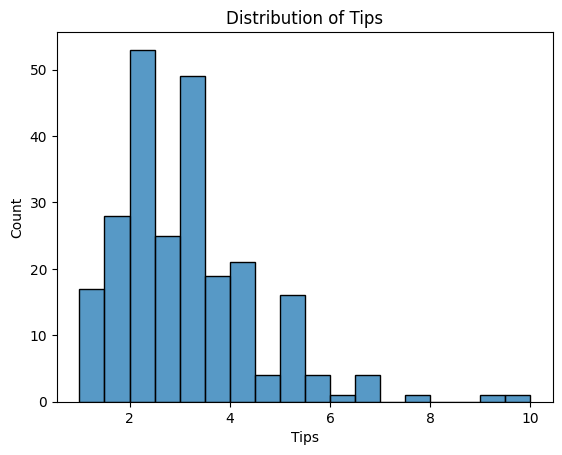

In [8]:
sns.histplot(tips["tip"])
plt.title("Distribution of Tips")
plt.xlabel("Tips")

Looking at our tips it appears that our data does not appear to be normally distributed and is right-skewed. For regression models, normalcy is important, thus a data transformation may be needed to build a suitable model. A good go-to would be to log transform tips.

Text(0.5, 0, 'Log Tips')

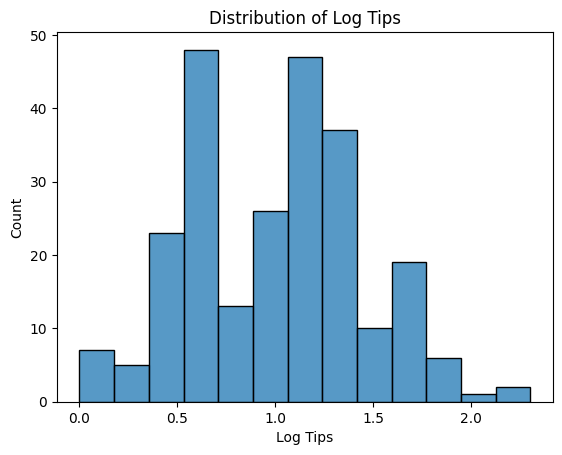

In [9]:
tips["log_tip"] = np.log(tips["tip"])
sns.histplot(tips["log_tip"])
plt.title("Distribution of Log Tips")
plt.xlabel("Log Tips")

We can see that the distribution of `tips` appears more normalized after transforming the data

#### Distribution of Total Bills

Text(0.5, 0, 'Total Bills')

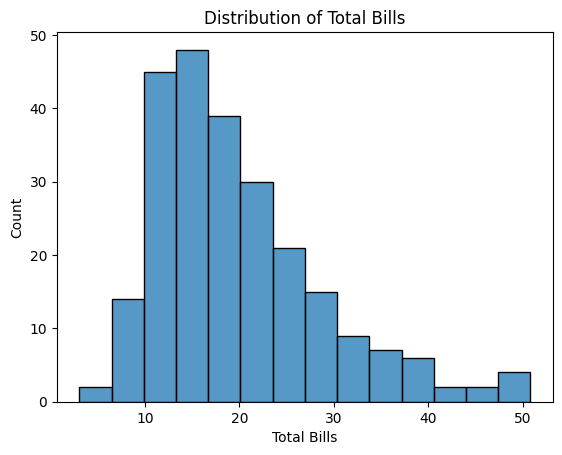

In [10]:
sns.histplot(tips["total_bill"])
plt.title("Distribution of Total Bills")
plt.xlabel("Total Bills")

Again, we can see that our variable here, this time `total_bill`, appears to be skewed to the right. We can try log transforming the data to check if it can be normalized.

Text(0.5, 0, 'Log Total Bills')

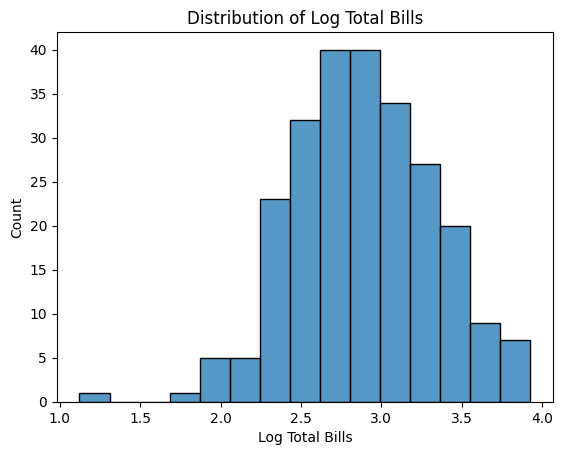

In [11]:
tips["log_total_bill"] = np.log(tips["total_bill"])
sns.histplot(tips["log_total_bill"])
plt.title("Distribution of Log Total Bills")
plt.xlabel("Log Total Bills")

Here we can see that log transforming `total_bill` does not seem to solve the issue of skewness, as it only made the data skew to the left now instead. Another transformation we can use is square-rooting the data.

Text(0.5, 0, 'Sqrt Total Bills')

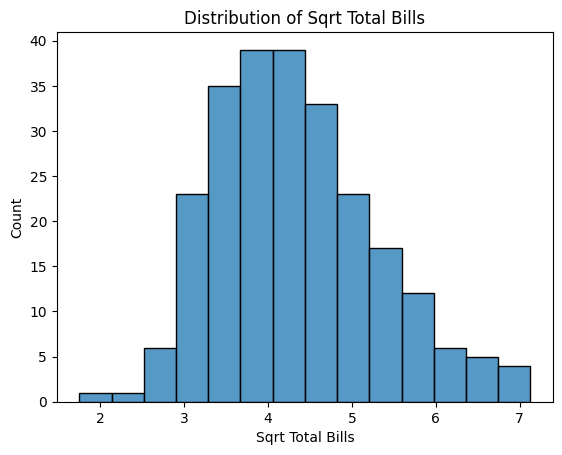

In [12]:
tips["sqrt_total_bill"] = np.sqrt(tips["total_bill"])
sns.histplot(tips["sqrt_total_bill"])
plt.title("Distribution of Sqrt Total Bills")
plt.xlabel("Sqrt Total Bills")

After square-rooting `total_bill`, we get a much better result, as our data now appears to be normalized, and is prepped for modeling.

#### Total Bills and Tips Relationship

Text(0, 0.5, 'Tips')

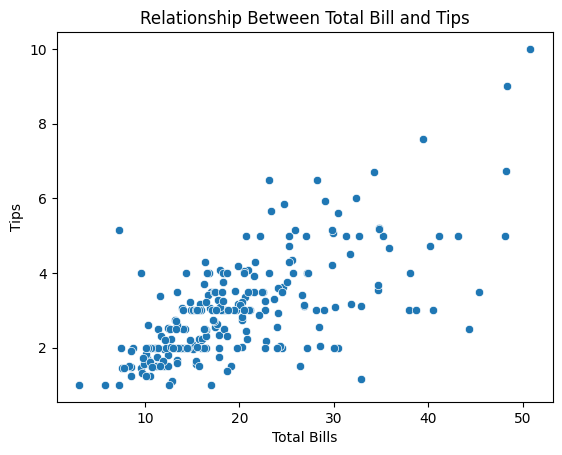

In [13]:
sns.scatterplot(x="total_bill", y="tip", data=tips)
plt.title("Relationship Between Total Bill and Tips")
plt.xlabel("Total Bills")
plt.ylabel("Tips")

Text(0, 0.5, 'Log Tips')

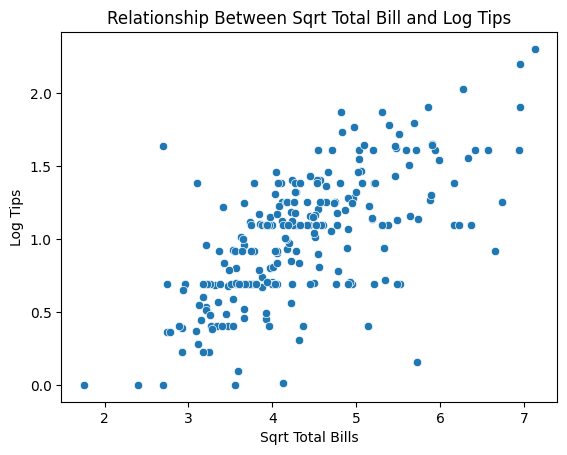

In [14]:
sns.scatterplot(x="sqrt_total_bill", y="log_tip", data=tips)
plt.title("Relationship Between Sqrt Total Bill and Log Tips")
plt.xlabel("Sqrt Total Bills")
plt.ylabel("Log Tips")

From our scatterplots we can see that there is a positive linear relationship between `total_bill` and `tip`. From our untransformed data, we can see that there is a higher concentration of points towards the lower values, whereas our transformed data shows a much better distribution across all values. These transformed variables would be suitable for our regression model.

#### Tips vs Categorical Variables

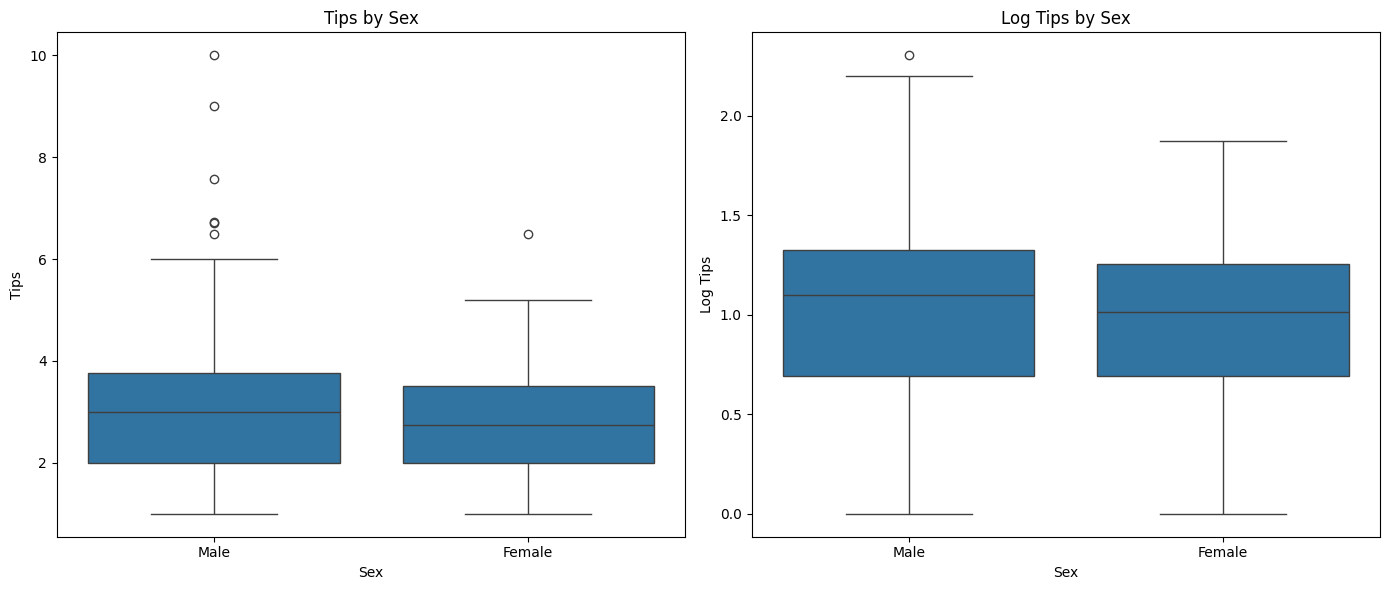

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))
sns.boxplot(x="sex", y="tip", data=tips, ax=axs[0])
axs[0].set_title("Tips by Sex")
axs[0].set_ylabel("Tips")
axs[0].set_xlabel("Sex")

sns.boxplot(x="sex", y="log_tip", data=tips, ax=axs[1])
axs[1].set_title("Log Tips by Sex")
axs[1].set_ylabel("Log Tips")
axs[1].set_xlabel("Sex")

plt.tight_layout()
plt.show()

Looking at the breakdown between `tip` and `sex`, males are, on average, more likely to tip higher than females. The log transformed tips also appears to have a decrease in outliers compared to the untransformed data.

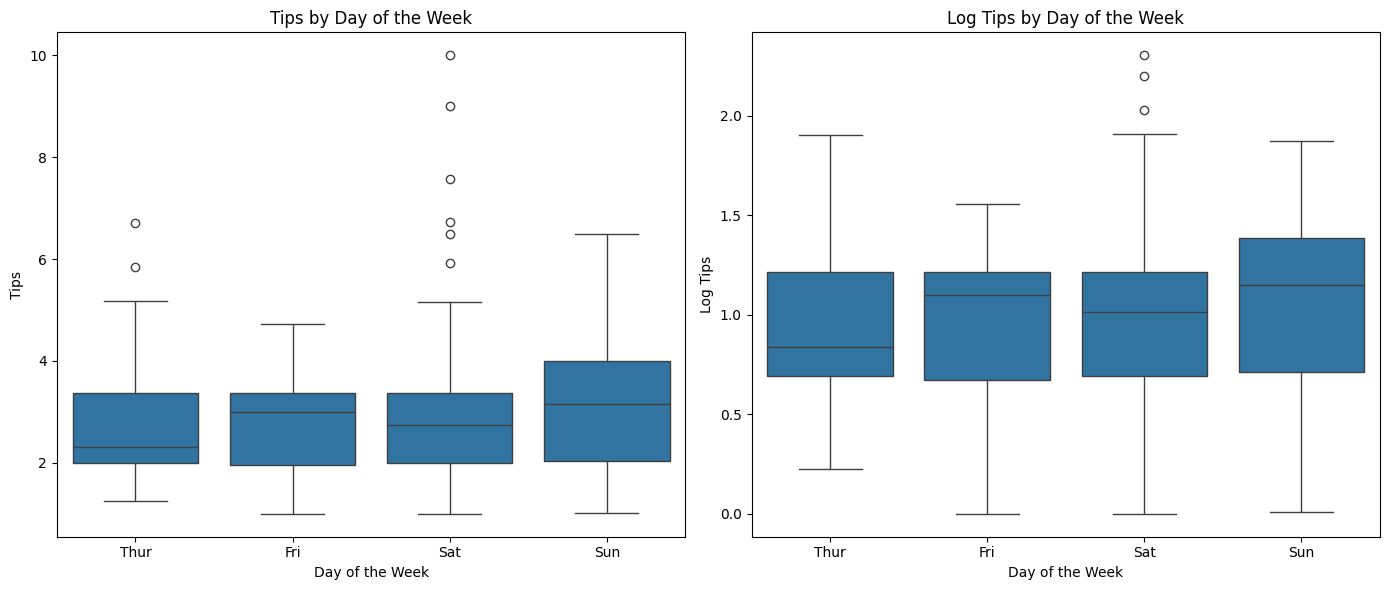

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))
sns.boxplot(x="day", y="tip", data=tips, ax=axs[0])
axs[0].set_title("Tips by Day of the Week")
axs[0].set_ylabel("Tips")
axs[0].set_xlabel("Day of the Week")

sns.boxplot(x="day", y="log_tip", data=tips, ax=axs[1])
axs[1].set_title("Log Tips by Day of the Week")
axs[1].set_ylabel("Log Tips")
axs[1].set_xlabel("Day of the Week")

plt.tight_layout()
plt.show()

From the data it appears that, on average, Sundays appear to have the tips, but Saturday has the most amount of outliers, so the highest possible tips could be achieved on that day. Thursdays appear to have the lowest average tips.

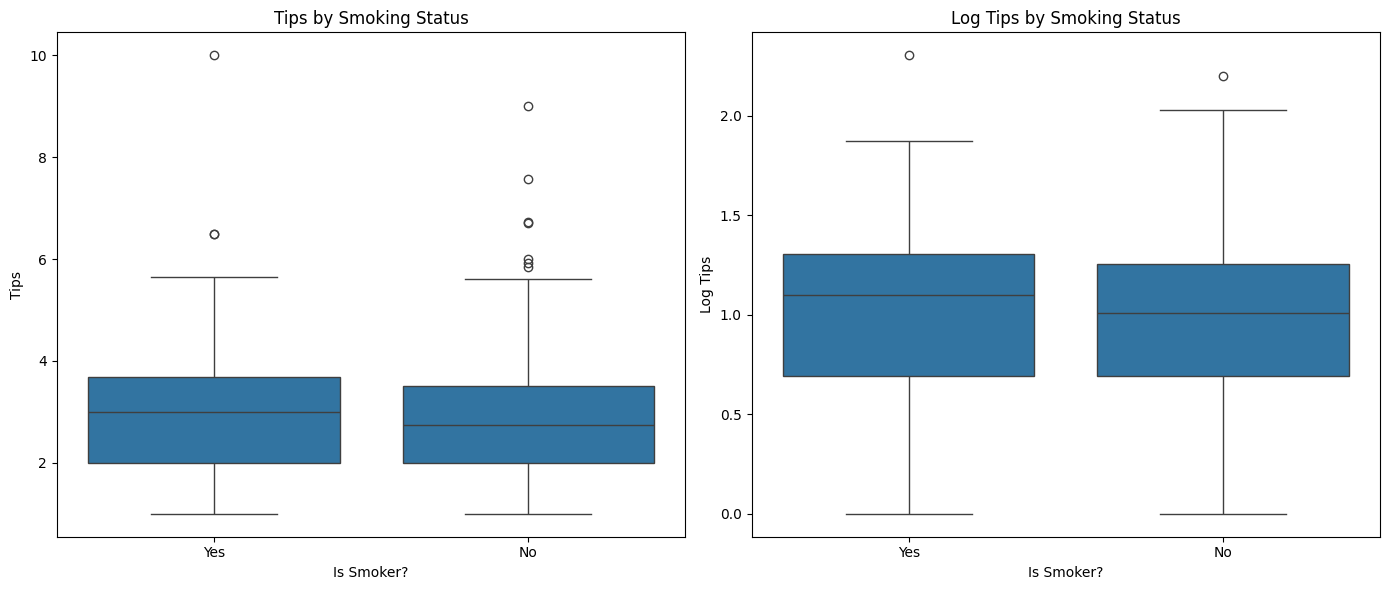

In [17]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))
sns.boxplot(x="smoker", y="tip", data=tips, ax=axs[0])
axs[0].set_title("Tips by Smoking Status")
axs[0].set_ylabel("Tips")
axs[0].set_xlabel("Is Smoker?")

sns.boxplot(x="smoker", y="log_tip", data=tips, ax=axs[1])
axs[1].set_title("Log Tips by Smoking Status")
axs[1].set_ylabel("Log Tips")
axs[1].set_xlabel("Is Smoker?")

plt.tight_layout()
plt.show()

There does not appear to be much of a difference between tipping values and smoking status, but smokers, on average, appear to tip higher than non-smokers.

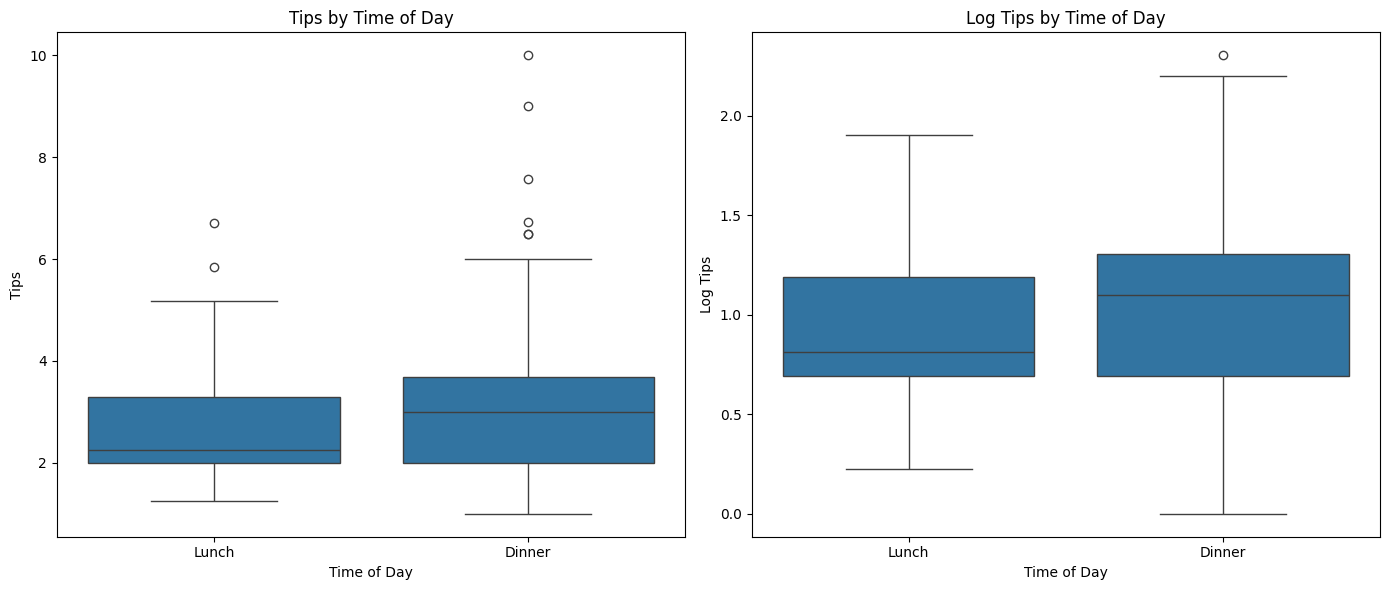

In [18]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))
sns.boxplot(x="time", y="tip", data=tips, ax=axs[0])
axs[0].set_title("Tips by Time of Day")
axs[0].set_ylabel("Tips")
axs[0].set_xlabel("Time of Day")

sns.boxplot(x="time", y="log_tip", data=tips, ax=axs[1])
axs[1].set_title("Log Tips by Time of Day")
axs[1].set_ylabel("Log Tips")
axs[1].set_xlabel("Time of Day")

plt.tight_layout()
plt.show()

From the plot, on average, people are likely to tip higher during dinner hours compared to lunch hours.

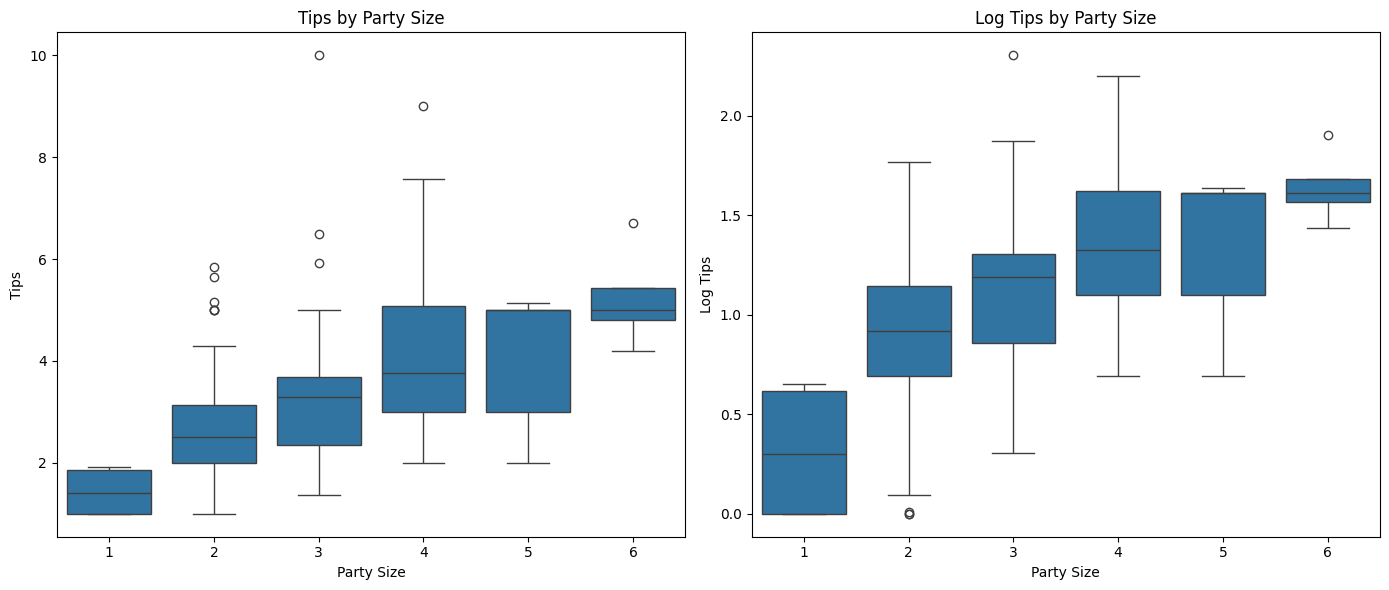

In [19]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))
sns.boxplot(x="size", y="tip", data=tips, ax=axs[0])
axs[0].set_title("Tips by Party Size")
axs[0].set_ylabel("Tips")
axs[0].set_xlabel("Party Size")

sns.boxplot(x="size", y="log_tip", data=tips, ax=axs[1])
axs[1].set_title("Log Tips by Party Size")
axs[1].set_ylabel("Log Tips")
axs[1].set_xlabel("Party Size")

plt.tight_layout()
plt.show()

Finally, larger party sizes appear to tip higher than lower sizes. This makes sense as larger party sizes tend to have higher bills.

### Model Building

In [20]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold, cross_validate
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import root_mean_squared_error, r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.svm import SVR
from sklearn.feature_selection import RFE

First, let's transform our dataset so that our categorical values are one-hot encoded. We'll use `drop_first` to remove one of the columns since it will be redundant and introduce multicollinearity into our model.

In [21]:
tips = sns.load_dataset("tips")
X = tips.drop(["tip"], axis=1)
y = tips["tip"]

sex_encodings = pd.get_dummies(X["sex"], prefix="Sex", drop_first=True, dtype=int)
X = X.drop("sex", axis=1)
smoker_encodings = pd.get_dummies(X["smoker"], prefix="Smoker", drop_first=True, dtype=int)
X = X.drop("smoker", axis=1)
day_encodings = pd.get_dummies(X["day"], drop_first=True, dtype=int)
X = X.drop("day", axis=1)
time_encodings = pd.get_dummies(X["time"], drop_first=True, dtype=int)
X = X.drop("time", axis=1)
size_encodings = pd.get_dummies(X["size"], prefix="Size", drop_first=True, dtype=int)
X = X.drop("size", axis=1)
X = pd.concat([X, sex_encodings, smoker_encodings, day_encodings, time_encodings, size_encodings], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape

(195, 12)

We can see that our training model has 12 features. Not all of these features will be useful however, let's build an initial full model with all features, and then add/remove when necessary.

In [22]:
numeric_features = ["total_bill"]
transformer = FunctionTransformer(np.sqrt, feature_names_out="one-to-one")
X_train[numeric_features] = transformer.fit_transform(X_train[numeric_features])
scaler = StandardScaler()
X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])

X_test[numeric_features] = transformer.transform(X_test[numeric_features])
X_test[numeric_features] = scaler.transform(X_test[numeric_features])

y_train_log = np.log(y_train)
y_test_log = np.log(y_test)

Here, we transform our numeric values, in this case `total_bill`, by square-rooting it. This will cause it to have a normal distribution and better fit our data as seen from earlier. We'll then scale the data for better model performance. We also transform our `y` values by logging them.

In [23]:
model = LinearRegression()
model.fit(X_train, y_train_log)

y_pred = model.predict(X_test)

scoring = {
    "neg_rmse": "neg_root_mean_squared_error",
	"neg_mse": "neg_mean_squared_error",
	"neg_mae": "neg_mean_absolute_error",
	"r2": "r2"
}

folds = KFold(n_splits=5, shuffle=True, random_state=42)
cv_results = cross_validate(
	estimator=model,
	X=X_train,
	y=y_train_log,
	scoring=scoring,
	cv=folds,
)

# Cross-Validation
print(f"CV RMSE = {-cv_results["test_neg_rmse"].mean():.3f}")
print(f"CV MSE = {-cv_results["test_neg_mse"].mean():.3f}")
print(f"CV MAE = {-cv_results["test_neg_mae"].mean():.3f}")
print(f"CV R^2 = {cv_results["test_r2"].mean():.3f}")

# On Testing Set
print(f"RMSE = {root_mean_squared_error(y_test_log, y_pred):.3f}")
print(f"MSE = {mean_squared_error(y_test_log, y_pred):.3f}")
print(f"MAE = {mean_absolute_error(y_test_log, y_pred):.3f}")
print(f"R^2 = {r2_score(y_test_log, y_pred):.3f}")

CV RMSE = 0.353
CV MSE = 0.130
CV MAE = 0.279
CV R^2 = 0.294
RMSE = 0.291
MSE = 0.085
MAE = 0.243
R^2 = 0.502


Here we can see that our testing results perform better than our cross validation results (lower RMSE, MSE and MAE and higher R^2). This indicates that our model can fare well with real-world data when it comes to predictions.

In [24]:
tips = sns.load_dataset("tips")
X = tips.drop(["tip"], axis=1)
y = tips["tip"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

categorical_features = ["sex", "smoker", "day", "time", "size"]

sqrt_transformer = FunctionTransformer(np.sqrt, feature_names_out="one-to-one")

preprocessor = ColumnTransformer(transformers=[
	("num", Pipeline([
		("sqrt", sqrt_transformer),
		("scale", StandardScaler())
	]), ["total_bill"]),
	("cat", OneHotEncoder(drop="first", dtype=int), categorical_features)
], remainder="passthrough")

model = Pipeline([
	("preprocessing", preprocessor),
	("regressor", LinearRegression())
])

y_train_log = np.log(y_train)
y_test_log = np.log(y_test)

model.fit(X_train, y_train_log)

scoring = {
    "neg_rmse": "neg_root_mean_squared_error",
	"neg_mse": "neg_mean_squared_error",
	"neg_mae": "neg_mean_absolute_error",
	"r2": "r2"
}

folds = KFold(n_splits=5, shuffle=True, random_state=42)
cv_results = cross_validate(
	estimator=model,
	X=X_train,
	y=y_train_log,
	scoring=scoring,
	cv=folds,
)

y_pred = model.predict(X_test)

print(f"CV RMSE = {-cv_results["test_neg_rmse"].mean():.3f}")
print(f"CV MSE = {-cv_results["test_neg_mse"].mean():.3f}")
print(f"CV MAE = {-cv_results["test_neg_mae"].mean():.3f}")
print(f"CV R^2 = {cv_results["test_r2"].mean():.3f}")

print(f"RMSE = {root_mean_squared_error(y_test_log, y_pred):.3f}")
print(f"MSE = {mean_squared_error(y_test_log, y_pred):.3f}")
print(f"MAE = {mean_absolute_error(y_test_log, y_pred):.3f}")
print(f"R^2 = {r2_score(y_test_log, y_pred):.3f}")

CV RMSE = 0.353
CV MSE = 0.130
CV MAE = 0.279
CV R^2 = 0.294
RMSE = 0.291
MSE = 0.085
MAE = 0.243
R^2 = 0.502


Here we get the same results using `sklearn` functions to create a model pipeline. This will be useful when we start evaluating different types of regressors and perform more feature selection to help streamline the process.

### Model Diagnostics

In [25]:
def model_diagnostic_plots(model_name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    residuals = y_test - y_pred
    
    plt.figure(figsize=(15,4))
    
    plt.subplot(1,3,1)
    sns.scatterplot(x=y_test, y=y_pred)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title(f"Actual vs Predicted for {model_name}")
    
    plt.subplot(1,3,2)
    sns.scatterplot(x=y_pred, y=residuals)
    plt.axhline(0, linestyle='--', color='red')
    plt.xlabel("Predicted")
    plt.ylabel("Residuals")
    plt.title(f"Residuals vs Predicted for {model_name}")
    
    plt.subplot(1,3,3)
    sns.histplot(residuals)
    plt.axvline(0, linestyle='--', color='red')
    plt.xlabel("Predicted")
    plt.ylabel("Residuals")
    plt.title(f"Residuals Distribution for {model_name}")

    plt.tight_layout()
    plt.show()

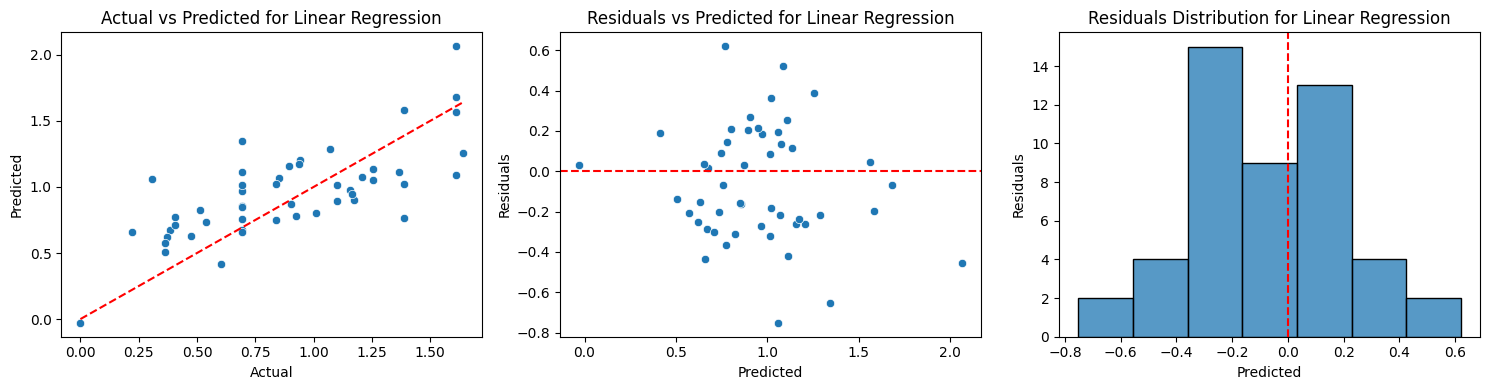

In [26]:
model_diagnostic_plots("Linear Regression", model, X_test, y_test_log)

For the predicted vs actual plot, we can see that our predicted values are relatively close to their actual values, indicating this model is able to predict the data well even if noise or variation is introduced.

For the residuals vs predicted plot, we can see that our residuals have no discernable pattern, indicating we have equal variance across the range of predicted values. 

For the residuals distribution plot, we can see that our residuals follow a normal distribution, indicating that our model fits our data well.

### Feature Selection

Now we'll use grid search to see if removing features could potentially improve our model.

In [27]:
folds = KFold(n_splits = 5, shuffle = True, random_state = 42)
hyper_params = [{"feature_selection__n_features_to_select": list(range(1, 13))}]

model = Pipeline([
	("preprocessing", preprocessor),
	("feature_selection", RFE(LinearRegression())),
	("regressor", LinearRegression())
])

model_cv = GridSearchCV(
	estimator=model,
	param_grid=hyper_params,
	scoring="r2",
	cv=folds,
	verbose=1,
	return_train_score=True
)

model_cv.fit(X_train, y_train_log)
cv_results = pd.DataFrame(model_cv.cv_results_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


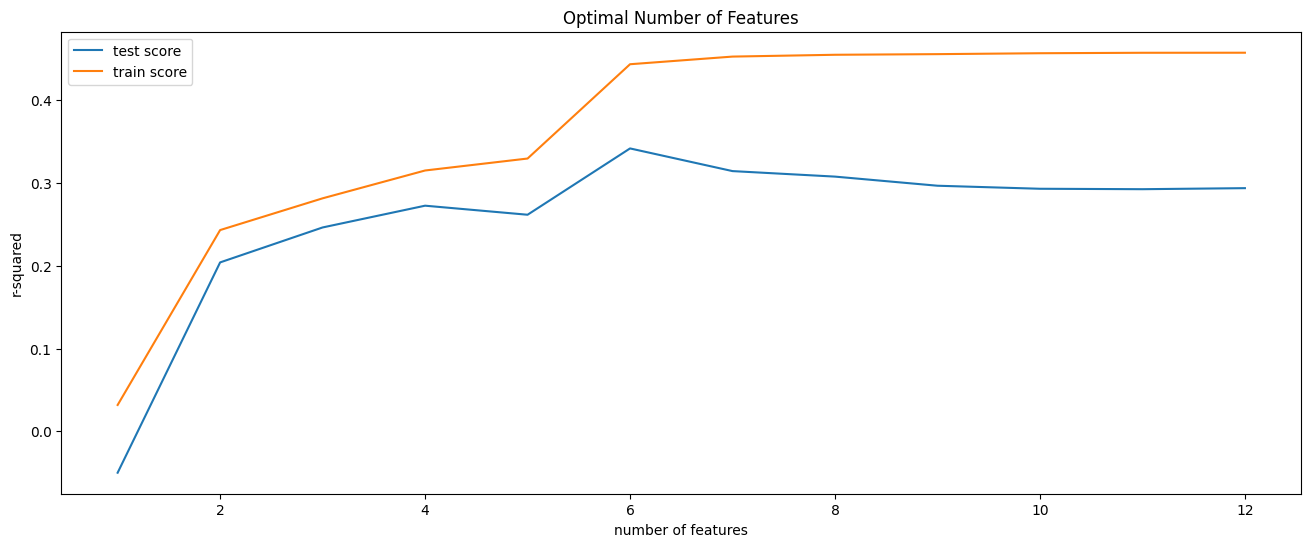

In [28]:
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_feature_selection__n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_feature_selection__n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

Here we can see that for testing, 6 features seems to be the optimal choice. For the training scores, there is not much a difference between the scores are 6 features and the scores from 7 to 12. We will use 6 features for our model.

In [29]:
model = Pipeline([
	("preprocessing", preprocessor),
	("feature_selection", RFE(LinearRegression(), n_features_to_select=6)),
	("regressor", LinearRegression())
])

model.fit(X_train, y_train_log)

scoring = {
    "neg_rmse": "neg_root_mean_squared_error",
	"neg_mse": "neg_mean_squared_error",
	"neg_mae": "neg_mean_absolute_error",
	"r2": "r2"
}

folds = KFold(n_splits=5, shuffle=True, random_state=42)
cv_results = cross_validate(
	estimator=model,
	X=X_train,
	y=y_train_log,
	scoring=scoring,
	cv=folds,
)

y_pred = model.predict(X_test)

print(f"CV RMSE = {-cv_results["test_neg_rmse"].mean():.3f}")
print(f"CV MSE = {-cv_results["test_neg_mse"].mean():.3f}")
print(f"CV MAE = {-cv_results["test_neg_mae"].mean():.3f}")
print(f"CV R^2 = {cv_results["test_r2"].mean():.3f}")

print(f"RMSE = {root_mean_squared_error(y_test_log, y_pred):.3f}")
print(f"MSE = {mean_squared_error(y_test_log, y_pred):.3f}")
print(f"MAE = {mean_absolute_error(y_test_log, y_pred):.3f}")
print(f"R^2 = {r2_score(y_test_log, y_pred):.3f}")

CV RMSE = 0.342
CV MSE = 0.122
CV MAE = 0.273
CV R^2 = 0.342
RMSE = 0.287
MSE = 0.082
MAE = 0.244
R^2 = 0.516


After performing some feature selection we can see that the R^2 for our new model is higher than that of our initial model.

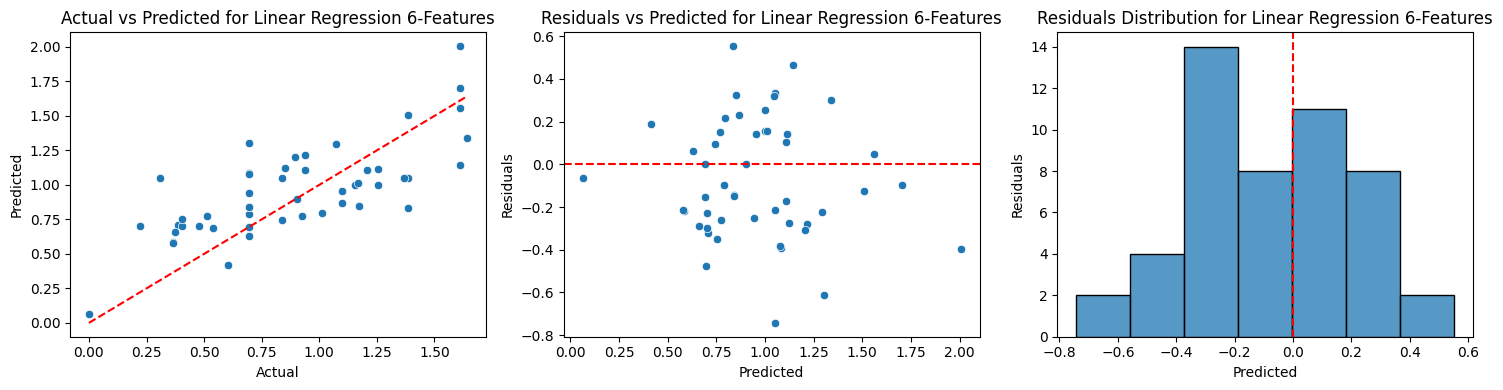

In [30]:
model_diagnostic_plots("Linear Regression 6-Features", model, X_test, y_test_log)

In our model diagnostic plots we can see that all conditions such as residuals being a normal distribution, actual vs predicted values following the diagonal, and equal variance in the residuals vs predicted plot, are kept.

### Total Bill vs Size Interaction

I wanted to see if there was any possible interaction we could have made between `total_bill` and `size`. In the real world, larger party sizes are more likely to have a larger total bill.

Fitting 5 folds for each of 15 candidates, totalling 75 fits


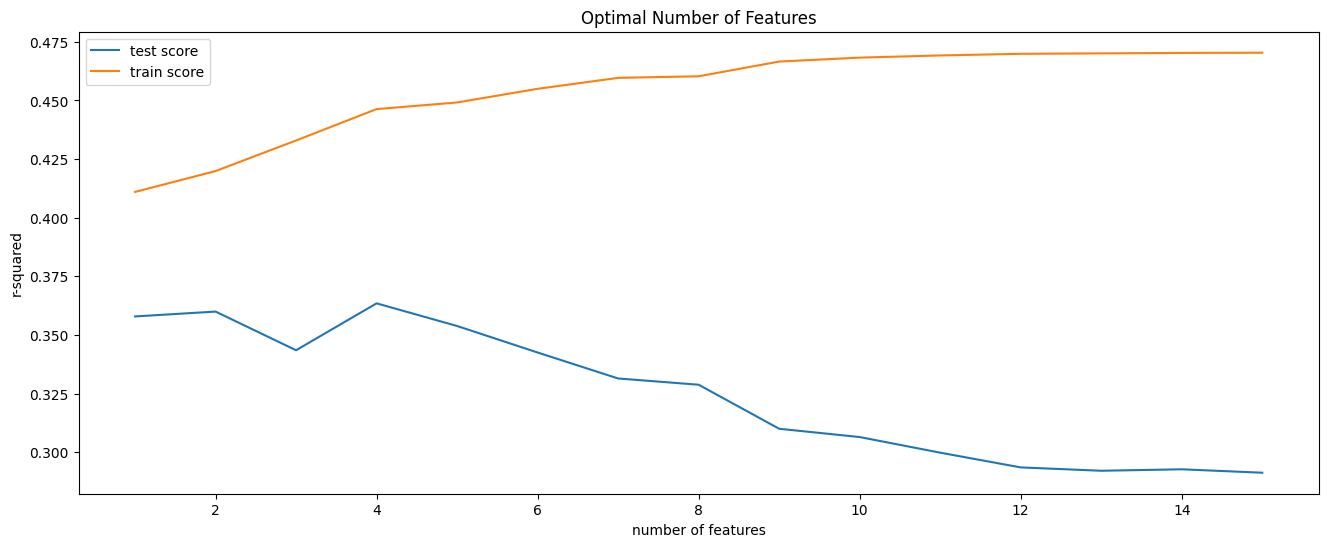

In [31]:
from sklearn.preprocessing import PolynomialFeatures

categorical_features = ["sex", "smoker", "day", "time", "size"]

sqrt_transformer = FunctionTransformer(np.sqrt, feature_names_out="one-to-one")
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)

interaction_pipeline = Pipeline([
	("poly", poly),
	("scale", StandardScaler())
])

sqrt_pipeline = Pipeline([
	("sqrt", sqrt_transformer),
	("scale", StandardScaler)
])

preprocessor = ColumnTransformer(transformers=[
	("interaction", interaction_pipeline, ["total_bill", "size"]),
	("sqrt", sqrt_transformer, ["total_bill"]),
	("cat", OneHotEncoder(drop="first", dtype=int), categorical_features)
], remainder="passthrough")

model = Pipeline([
	("preprocessing", preprocessor),
	("regressor", LinearRegression())
])

y_train_log = np.log(y_train)
y_test_log = np.log(y_test)

model.fit(X_train, y_train_log)

folds = KFold(n_splits = 5, shuffle = True, random_state = 42)
cnt_features = len(model[:-1].get_feature_names_out())
hyper_params = [{"feature_selection__n_features_to_select": list(range(1, cnt_features+1))}]

model = Pipeline([
	("preprocessing", preprocessor),
	("feature_selection", RFE(LinearRegression())),
	("regressor", LinearRegression())
])

model_cv = GridSearchCV(
	estimator=model,
	param_grid=hyper_params,
	scoring="r2",
	cv=folds,
	verbose=1,
	return_train_score=True
)

model_cv.fit(X_train, y_train_log)
cv_results = pd.DataFrame(model_cv.cv_results_)

plt.figure(figsize=(16,6))

plt.plot(cv_results["param_feature_selection__n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_feature_selection__n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')



Here we notice that our testing R^2 begins to suffer after 4 features.

In [32]:
model = Pipeline([
	("preprocessing", preprocessor),
	("feature_selection", RFE(LinearRegression(), n_features_to_select=4)),
	("regressor", LinearRegression())
])

model.fit(X_train, y_train_log)

scoring = {
    "neg_rmse": "neg_root_mean_squared_error",
	"neg_mse": "neg_mean_squared_error",
	"neg_mae": "neg_mean_absolute_error",
	"r2": "r2"
}

folds = KFold(n_splits=5, shuffle=True, random_state=42)
cv_results = cross_validate(
	estimator=model,
	X=X_train,
	y=y_train_log,
	scoring=scoring,
	cv=folds,
)

y_pred = model.predict(X_test)

print(f"CV RMSE = {-cv_results["test_neg_rmse"].mean():.3f}")
print(f"CV MSE = {-cv_results["test_neg_mse"].mean():.3f}")
print(f"CV MAE = {-cv_results["test_neg_mae"].mean():.3f}")
print(f"CV R^2 = {cv_results["test_r2"].mean():.3f}")

print(f"RMSE = {root_mean_squared_error(y_test_log, y_pred):.3f}")
print(f"MSE = {mean_squared_error(y_test_log, y_pred):.3f}")
print(f"MAE = {mean_absolute_error(y_test_log, y_pred):.3f}")
print(f"R^2 = {r2_score(y_test_log, y_pred):.3f}")

CV RMSE = 0.336
CV MSE = 0.118
CV MAE = 0.261
CV R^2 = 0.363
RMSE = 0.277
MSE = 0.077
MAE = 0.227
R^2 = 0.550


Our final resulting R^2 for testing is `0.55`, higher than all our other models, and none of the MSE metrics look wrong either.

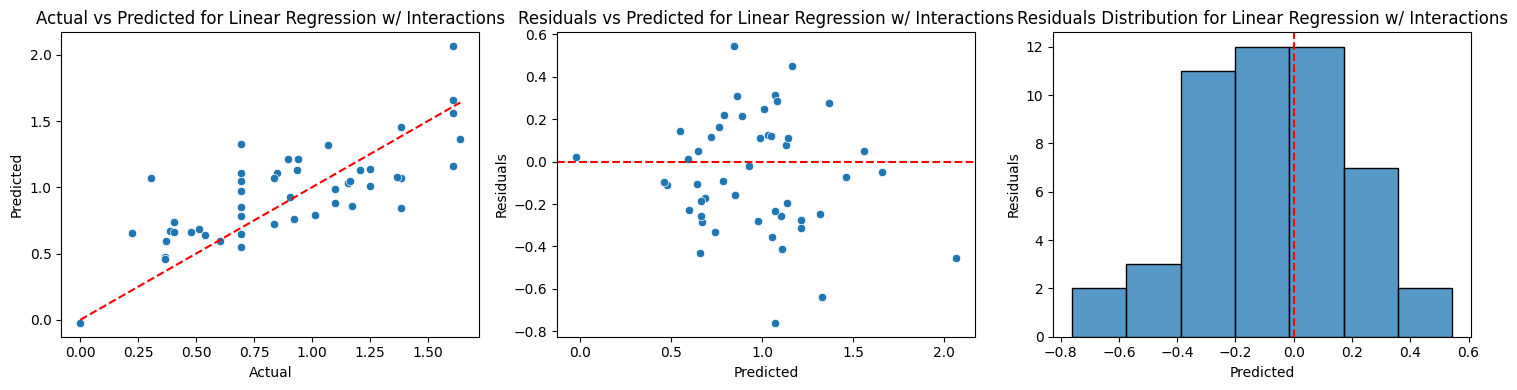

In [33]:
model_diagnostic_plots("Linear Regression w/ Interactions", model, X_test, y_test_log)

Model diagnostics also appear to be showing the expected behavior.

### Other Algorithms

In [37]:
preprocessor = ColumnTransformer(transformers=[
	("num", Pipeline([
		("sqrt", sqrt_transformer),
		("scale", StandardScaler())
	]), ["total_bill"]),
	("cat", OneHotEncoder(drop="first", dtype=int), categorical_features)
], remainder="passthrough")

models = {
	"Linear": Pipeline([
		("preprocessor", preprocessor),
		("feature_selection", RFE(estimator=LinearRegression())),
		("regressor", LinearRegression())
	]),
	"Ridge": Pipeline([
		("preprocessor", preprocessor),
		("feature_selection", RFE(estimator=Ridge())),
		("regressor", Ridge())
	]),
	"Lasso": Pipeline([
		("preprocessor", preprocessor),
		("feature_selection", RFE(estimator=Lasso())),
		("regressor", Lasso())
	]),
	"SVR": Pipeline([
		("preprocessor", preprocessor),
		("regressor", SVR())
	]),
	"RandomForest": Pipeline([
			("preprocessor", preprocessor),
			("regressor", RandomForestRegressor())
	])
}


param_grids = {
	"Linear": {"feature_selection__n_features_to_select": list(range(1, 13))},
	"Ridge": {
		"feature_selection__n_features_to_select": list(range(1, 13)),
		"regressor__alpha": [0.001, 0.01, 0.1, 1.0, 10]
	},
	"Lasso": {
		"feature_selection__n_features_to_select": list(range(1, 13)),
		"regressor__alpha": [0.001, 0.01, 0.1, 1.0, 10]
	},
	"SVR": {
		"regressor__C": [0.01, 0.1, 1, 10],
		"regressor__kernel": ["rbf", "linear"]
	},
	"RandomForest": {
        "regressor__n_estimators": [100, 200, 300],
        "regressor__max_depth": [None, 5, 10, 15]
    }
}

results = {}
folds = KFold(n_splits=5, shuffle=True, random_state=42)
for name, pipeline in models.items():
    grid = GridSearchCV(
        estimator=pipeline,
        param_grid=param_grids[name],
        scoring="r2",
        cv=folds,
        verbose=0,
        n_jobs=-1
    )
    grid.fit(X_train, y_train_log)
    
    results[name] = {
        'best_score': grid.best_score_,
        'best_params': grid.best_params_,
        'model': grid.best_estimator_
    }

for name, res in results.items():
    print(f"{name}: R^2 = {res['best_score']:.3f}, Best Params = {res['best_params']}")

Linear: R^2 = 0.342, Best Params = {'feature_selection__n_features_to_select': 6}
Ridge: R^2 = 0.363, Best Params = {'feature_selection__n_features_to_select': 2, 'regressor__alpha': 1.0}
Lasso: R^2 = 0.345, Best Params = {'feature_selection__n_features_to_select': 12, 'regressor__alpha': 0.01}
SVR: R^2 = 0.358, Best Params = {'regressor__C': 0.01, 'regressor__kernel': 'linear'}
RandomForest: R^2 = 0.303, Best Params = {'regressor__max_depth': 5, 'regressor__n_estimators': 100}


In [38]:
models = {
	"Linear": Pipeline([
		("preprocessor", preprocessor),
		("feature_selection", RFE(estimator=LinearRegression(), n_features_to_select=6)),
		("regressor", LinearRegression())
	]),
	"Ridge": Pipeline([
		("preprocessor", preprocessor),
		("feature_selection", RFE(estimator=Ridge(), n_features_to_select=2)),
		("regressor", Ridge(alpha=1))
	]),
	"Lasso": Pipeline([
		("preprocessor", preprocessor),
		("feature_selection", RFE(estimator=Lasso(), n_features_to_select=12)),
		("regressor", Lasso(alpha=0.01))
	]),
	"SVR": Pipeline([
		("preprocessor", preprocessor),
		("regressor", SVR(C=0.01, kernel="linear"))
	]),
	"RandomForest": Pipeline([
			("preprocessor", preprocessor),
			("regressor", RandomForestRegressor(max_depth=5, n_estimators=100))
	])
}

results = []
for name, model in models.items():
    model.fit(X_train, y_train_log)
    y_pred = model.predict(X_test)
    
    rmse = root_mean_squared_error(y_test_log, y_pred)
    mse = mean_squared_error(y_test_log, y_pred)
    mae = mean_absolute_error(y_test_log, y_pred)
    r2 = r2_score(y_test_log, y_pred)
    
    results.append({
        "Model": name,
        "RMSE": rmse,
        "MSE": mse,
        "MAE": mae,
        "R^2": r2
    })
    
print(pd.DataFrame(results)) 

          Model      RMSE       MSE       MAE       R^2
0        Linear  0.286821  0.082266  0.244378  0.516045
1         Ridge  0.272468  0.074239  0.230729  0.563269
2         Lasso  0.276556  0.076483  0.234061  0.550066
3           SVR  0.287901  0.082887  0.243645  0.512391
4  RandomForest  0.299098  0.089460  0.248907  0.473727


Looking at these results, the Random Forest model underperforms the most. The SVR and base Linear Regression model both perform similarly to each other. The Ridge and Lasso models appear to have the best results. The concerning aspect of the Ridge model, however, is that it only uses 2 of the 13 features. This could indicate that the model performs best on the hold out set but may not perform the best on other data. Since our data is sparse from one-hot encoding the categorical data, it might be the better suited model for this project. Thus, the lasso regression model is our chosen ML model. 